In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargo mis dos bases de datos y fusiono
database1 = "data/winemag-data_first150k.csv"
df1 = pd.read_csv(database1)
database2 = "data/winemag-data-130k-v2.csv"
df2 = pd.read_csv(database2)

#comparo las columnas porque quiero fusionar y luego limpiar la infomacion que no me interesa
print(df1.columns)
print(df2.columns)
columnas_comunes = df1.columns.intersection(df2.columns)
print(columnas_comunes)

#Fusiono las dos bases de datos con un left join
df_wine = pd.merge(df1, df2, how="outer" , on=list(columnas_comunes))
df_wine = df_wine.drop(columns=['taster_twitter_handle', 'title', 'taster_name'])


print(df_wine.head())


Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')
   Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           0        US  This tremendous 100% varietal wine hails from ...   
2           1  Portugal  This is ripe and fruity, a wine that is smooth...   
3           1     Spain  Ripe aromas of fig, blackberry and cassis are ...   
4           2        US  Mac Watson honors the mem

In [4]:
#Quitar duplicados
duplicados = df_wine.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados}")

#Quiero ver la cantidad de NaN por columna que tengo al fusionar
print(df_wine.isna().sum())
print(df_wine.isna().mean() * 100) 

#Voy a tranformar los valores NaN de la region 2 directamente con el valor de region 1
df_wine['region_2'] = df_wine['region_2'].fillna(df_wine['region_1'])

# Eliminar las filas que tengan NaN en la columna 'region_1' y precio
df_wine = df_wine.dropna(subset=['region_1'])
df_wine = df_wine.dropna(subset=['price'])

#Cambiaremos las designaciones que es un parametro que no me resulta del todo importante por el valor "Desconocido"
df_wine['designation'] = df_wine['designation'].fillna('Desconocido')

# Verificar si se eliminaron las filas correctamente
print(df_wine.head())

#compruebo el numero de filas, tenia 280899 y ahora 215792
numero_filas = df_wine.shape[0]
print("Número de filas en el DataFrame:", numero_filas)



Total de filas duplicadas: 0
Unnamed: 0          0
country            68
description         0
designation     83200
points              0
price           22691
province           68
region_1        46307
region_2       169436
variety             1
winery              0
dtype: int64
Unnamed: 0      0.000000
country         0.024208
description     0.000000
designation    29.619082
points          0.000000
price           8.077964
province        0.024208
region_1       16.485226
region_2       60.318975
variety         0.000356
winery          0.000000
dtype: float64
   Unnamed: 0 country                                        description  \
1           0      US  This tremendous 100% varietal wine hails from ...   
3           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
4           2      US  Mac Watson honors the memory of a wine once ma...   
5           2      US  Tart and snappy, the flavors of lime flesh and...   
6           3      US  Pineapple rind, lemon p

In [5]:
df_wine.info()
#reseteamos indice
df_wine.reset_index(drop=True, inplace=True)
print(df_wine.head())

<class 'pandas.core.frame.DataFrame'>
Index: 215792 entries, 1 to 280899
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215792 non-null  int64  
 1   country      215792 non-null  object 
 2   description  215792 non-null  object 
 3   designation  215792 non-null  object 
 4   points       215792 non-null  int64  
 5   price        215792 non-null  float64
 6   province     215792 non-null  object 
 7   region_1     215792 non-null  object 
 8   region_2     215792 non-null  object 
 9   variety      215792 non-null  object 
 10  winery       215792 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 19.8+ MB
   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the

Ahora que tenemos todo limpio empiezo con mis diferentes propuestas de estudio!
Lo he divido por estos: 
1. Relación entre precio, puntuación y calidad-precio

Enunciado: ¿Cómo se relacionan los precios de los vinos con su calidad según su valor?

Hipótesis: Los vinos con un precio más alto tienen una mayor puntuación, pero el ratio de calidad-precio puede ser más favorable en vinos de precio medio o bajo.

Descripción: Esta hipótesis se basa en la idea de que el precio no siempre es un reflejo lineal de la calidad. Aunque los vinos caros suelen recibir puntuaciones más altas, los vinos más asequibles pueden ofrecer un mejor balance entre calidad y precio, lo que podría resultar en una mejor relación calidad-precio.

2. Variedades y regiones como factores diferenciadores

Enunciado: ¿Cómo las variedades de uva y las regiones influyen en la calidad y el precio del vino?

Hipótesis: Las variedades de uva autóctonas de regiones vinícolas prestigiosas tendrán un precio más alto debido a su rareza y reputación, pero los vinos de otras variedades locales pueden ofrecer mejor calidad a precios más bajos.

Descripción: La hipótesis sugiere que las variedades de uva que provienen de regiones famosas, como la Cabernet Sauvignon en Burdeos, están asociadas con precios elevados debido al reconocimiento global de estas zonas. Sin embargo, variedades locales menos conocidas podrían ofrecer una calidad comparable a un costo inferior.

3. Qué características comunes tienen los vinos más top

Enunciado: ¿Qué características son comunes en los vinos más exclusivos?

Hipótesis: Los vinos más exclusivos comparten características como un proceso de vinificación meticuloso, una puntuación elevada, y el uso de variedades de uva limitadas y de alta calidad provenientes de regiones vinícolas famosas.

Descripción: Esta hipótesis se basa en la idea de que los vinos de alta gama tienen ciertas características en común, tales como una producción limitada, el uso de métodos de vinificación avanzados, y un origen en zonas reconocidas. Estos factores contribuyen a la calidad superior de estos vinos, lo que se refleja en su precio elevado.

4. Segmentación de precios

Enunciado: ¿Cómo varían las características de los vinos en diferentes segmentos de precios?

Hipótesis: Los vinos en el segmento de precios más alto tienen una mayor puntuación, provienen de regiones vinícolas reconocidas, y utilizan variedades de uva de alta calidad, mientras que los vinos de precios más bajos tienen puntuaciones más bajas y variedades menos conocidas.

Descripción: La hipótesis sugiere que existe una relación directa entre el precio y las características del vino. Los vinos más caros suelen estar vinculados a puntuaciones altas, a una producción más limitada, y a una procedencia de regiones vinícolas prestigiosas, mientras que los vinos más baratos tienen características menos sofisticadas.

5. Análisis temporal (si tienes datos de año)

Enunciado: ¿Cómo han cambiado las puntuaciones y los precios de los vinos con el tiempo?

Hipótesis: Las puntuaciones de los vinos han mejorado con el tiempo debido a los avances en la viticultura y en los métodos de producción, pero los precios han aumentado aún más debido a la creciente demanda y reputación global de los vinos.

Descripción: Se postula que los vinos han experimentado un aumento en calidad debido a la innovación en técnicas de vinificación, pero el crecimiento de la demanda y la globalización han hecho que los precios aumenten más rápido que las puntuaciones, creando una brecha entre calidad y precio a lo largo del tiempo.

6. Relación entre el precio y la ubicación geográfica

Enunciado: ¿Existe alguna correlación entre los precios de los vinos y su ubicación geográfica (provincia, región o país)?

Hipótesis: Los precios de los vinos varían considerablemente según la ubicación geográfica, siendo los vinos provenientes de regiones vinícolas famosas como Burdeos y Borgoña más caros que aquellos de zonas menos reconocidas, incluso si las puntuaciones son similares.

Descripción: La hipótesis se basa en que la ubicación geográfica tiene un gran impacto en el precio del vino. Las regiones con una reputación histórica, como Burdeos o Borgoña, tienden a tener precios más altos debido a su renombre global, incluso si la calidad del vino de otras regiones como España es comparable.

7. Análisis comparativo entre países o regiones

Enunciado: ¿Cómo se compara la relación entre precio y puntuación en diferentes regiones como España, Burdeos y Borgoña?

Hipótesis: Los vinos de Burdeos y Borgoña tienen precios más altos debido a la reputación de las regiones, pero los vinos españoles pueden ofrecer una mejor relación calidad-precio, con puntuaciones similares o incluso superiores a un precio más bajo.

Descripción: Esta hipótesis sugiere que, aunque los vinos de regiones como Burdeos y Borgoña están asociados con precios más altos debido a su prestigio histórico, los vinos de otras regiones como España podrían ofrecer una calidad comparable a precios más bajos, lo que mejora la relación calidad-precio.



     country      price
3     France  43.230158
4      Italy  38.560732
2     Canada  35.243304
6         US  35.064039
1  Australia  32.594350
5      Spain  27.568353
0  Argentina  22.301745


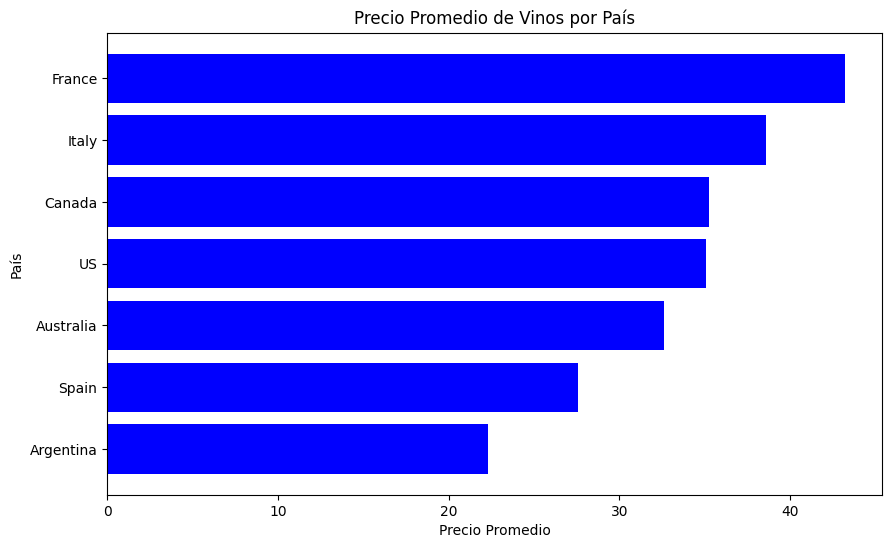

In [8]:
#Precios por paises


# Agrupar por país y calcular el precio promedio
precio_promedio_por_pais = df_wine.groupby('country')['price'].mean().reset_index()

# Ordenar por precio de manera descendente (opcional)
precio_promedio_por_pais = precio_promedio_por_pais.sort_values(by='price', ascending=False)

# Mostrar la tabla resultante
print(precio_promedio_por_pais)

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
plt.barh(precio_promedio_por_pais['country'], precio_promedio_por_pais['price'], color='blue')
plt.xlabel('Precio Promedio')
plt.ylabel('País')
plt.title('Precio Promedio de Vinos por País')
plt.gca().invert_yaxis()  # Para mostrar los países con precios más altos en la parte superior
plt.show()


     country     points
2     Canada  88.877232
3     France  88.678499
4      Italy  88.526869
6         US  88.172995
1  Australia  88.109936
5      Spain  86.928489
0  Argentina  86.287637


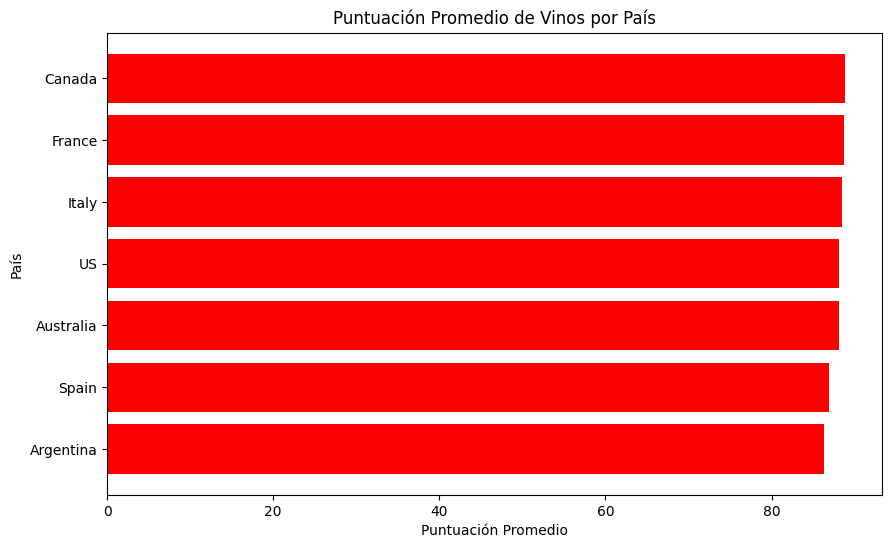

In [9]:
#Puntos por paises

# Agrupar por país y calcular la puntuación promedio
puntuacion_promedio_por_pais = df_wine.groupby('country')['points'].mean().reset_index()

# Ordenar por puntuación de manera descendente (opcional)
puntuacion_promedio_por_pais = puntuacion_promedio_por_pais.sort_values(by='points', ascending=False)

# Mostrar la tabla resultante
print(puntuacion_promedio_por_pais)

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
plt.barh(puntuacion_promedio_por_pais['country'], puntuacion_promedio_por_pais['points'], color='red')
plt.xlabel('Puntuación Promedio')
plt.ylabel('País')
plt.title('Puntuación Promedio de Vinos por País')
plt.gca().invert_yaxis()  # Para mostrar los países con puntuaciones más altas en la parte superior
plt.show()


     country  calidad_precio
0  Argentina        5.613013
5      Spain        5.127892
1  Australia        4.439065
3     France        3.791768
4      Italy        3.607732
6         US        3.484772
2     Canada        3.307697


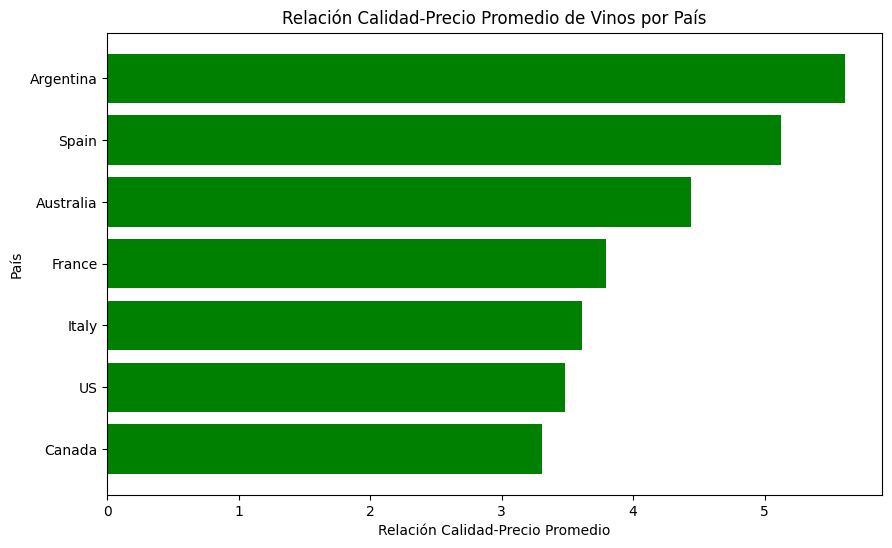

In [14]:
#Calidad precio de los paises 
# Crear una nueva columna que sea la relación calidad-precio
df_wine['calidad_precio'] = df_wine['points'] / df_wine['price']

# Agrupar por país y calcular la relación calidad-precio promedio
calidad_precio_promedio_por_pais = df_wine.groupby('country')['calidad_precio'].mean().reset_index()

# Ordenar por calidad-precio promedio de manera descendente (opcional)
calidad_precio_promedio_por_pais = calidad_precio_promedio_por_pais.sort_values(by='calidad_precio', ascending=False)

# Mostrar la tabla resultante
print(calidad_precio_promedio_por_pais)

# Crear una gráfica de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(calidad_precio_promedio_por_pais['country'], calidad_precio_promedio_por_pais['calidad_precio'], color='Green')
plt.xlabel('Relación Calidad-Precio Promedio')
plt.ylabel('País')
plt.title('Relación Calidad-Precio Promedio de Vinos por País')
plt.gca().invert_yaxis()  # Para mostrar los países con la mejor relación calidad-precio en la parte superior
plt.show()


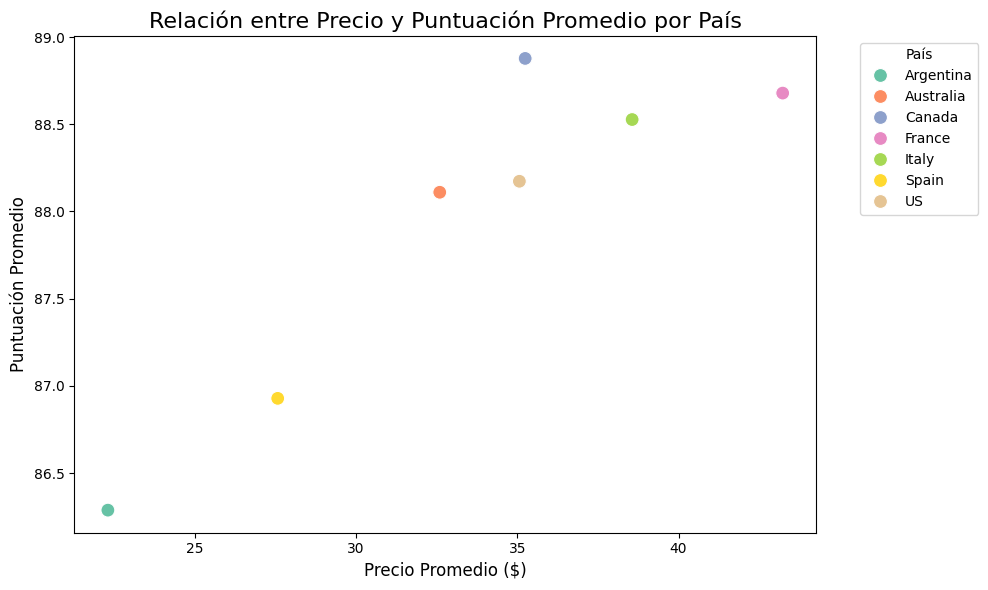

In [12]:
#Relacion entre precio y puntacion por pais
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
tabla_precios_puntuaciones = df_wine.groupby('country').agg({'price': 'mean', 'points': 'mean'}).reset_index()

sns.scatterplot(data=tabla_precios_puntuaciones, x='price', y='points', hue='country', palette='Set2', s=100)

# Añadir títulos y etiquetas
plt.title('Relación entre Precio y Puntuación Promedio por País', fontsize=16)
plt.xlabel('Precio Promedio ($)', fontsize=12)
plt.ylabel('Puntuación Promedio', fontsize=12)

# Mostrar la leyenda
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()



C:\Users\mario\AppData\Local\Temp\ipykernel_7596\1843132716.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_caros = df_wine.groupby('country').apply(lambda x: x.nlargest(50, 'price')).reset_index(drop=True)


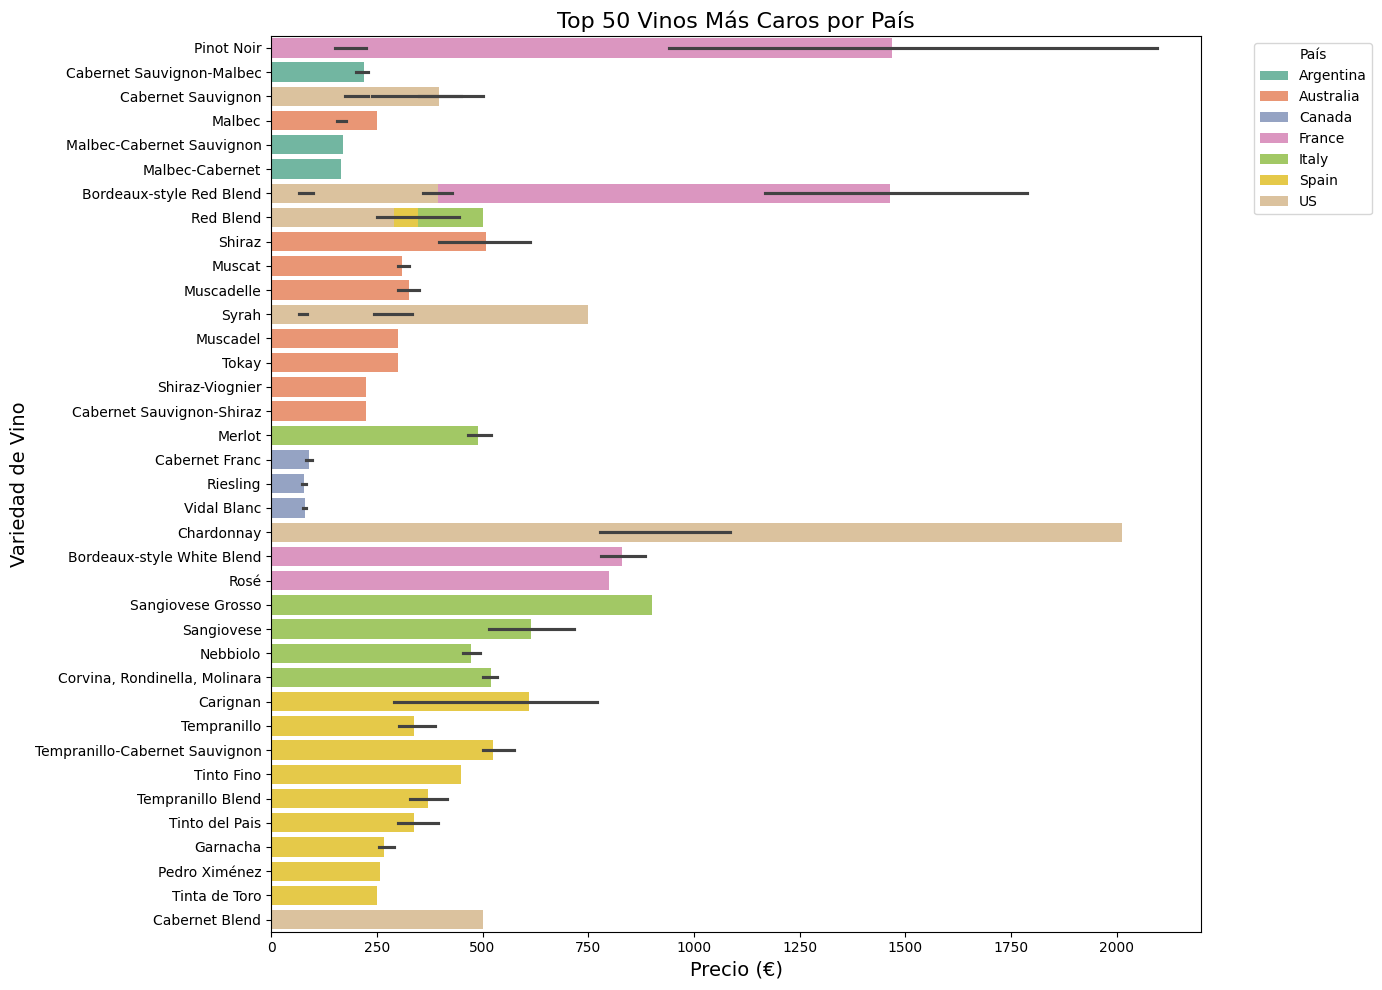

In [17]:

# Gráfico de los top 50 vinos más caros por país
top_10_caros = df_wine.groupby('country').apply(lambda x: x.nlargest(50, 'price')).reset_index(drop=True)

# Configuración del gráfico
plt.figure(figsize=(14, 10))
sns.barplot(data=top_10_caros, x='price', y='variety', hue='country', dodge=False, palette='Set2')

plt.title('Top 50 Vinos Más Caros por País', fontsize=16)
plt.xlabel('Precio (€)', fontsize=14)
plt.ylabel('Variedad de Vino', fontsize=14)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_7596\152880802.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_50_baratos = df_wine.groupby('country').apply(lambda x: x.nsmallest(50, 'price')).reset_index(drop=True)


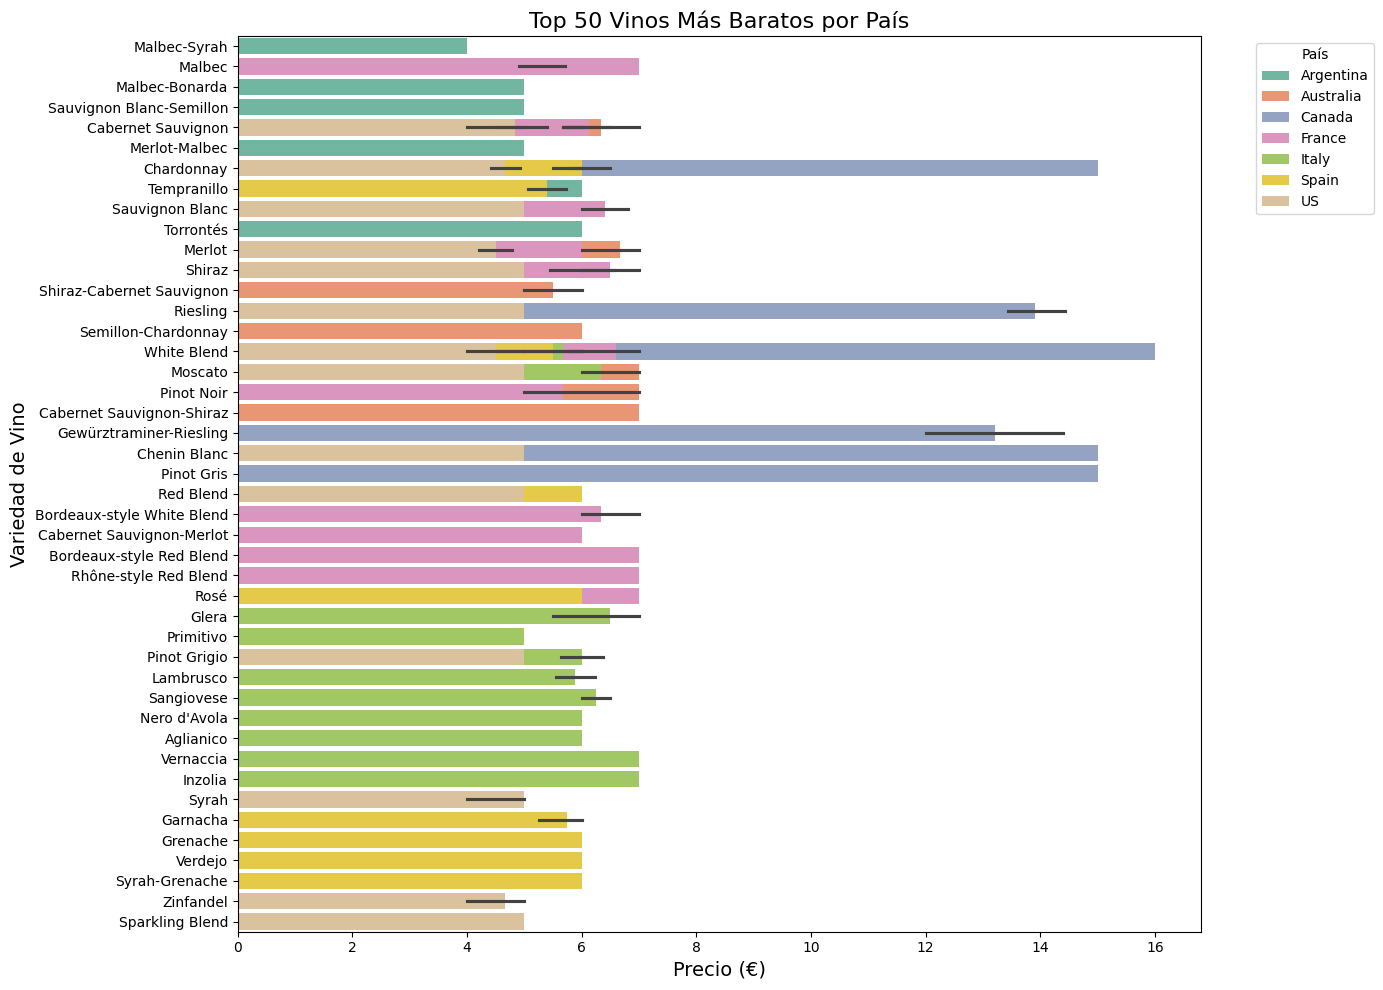

In [18]:
# Gráfico de los top 50 vinos más baratos por país
top_50_baratos = df_wine.groupby('country').apply(lambda x: x.nsmallest(50, 'price')).reset_index(drop=True)

# Configuración del gráfico
plt.figure(figsize=(14, 10))
sns.barplot(data=top_50_baratos, x='price', y='variety', hue='country', dodge=False, palette='Set2')

plt.title('Top 50 Vinos Más Baratos por País', fontsize=16)
plt.xlabel('Precio (€)', fontsize=14)
plt.ylabel('Variedad de Vino', fontsize=14)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_7596\4289335352.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_caros = df_wine.groupby('country').apply(lambda x: x.nlargest(50, 'points')).reset_index(drop=True)


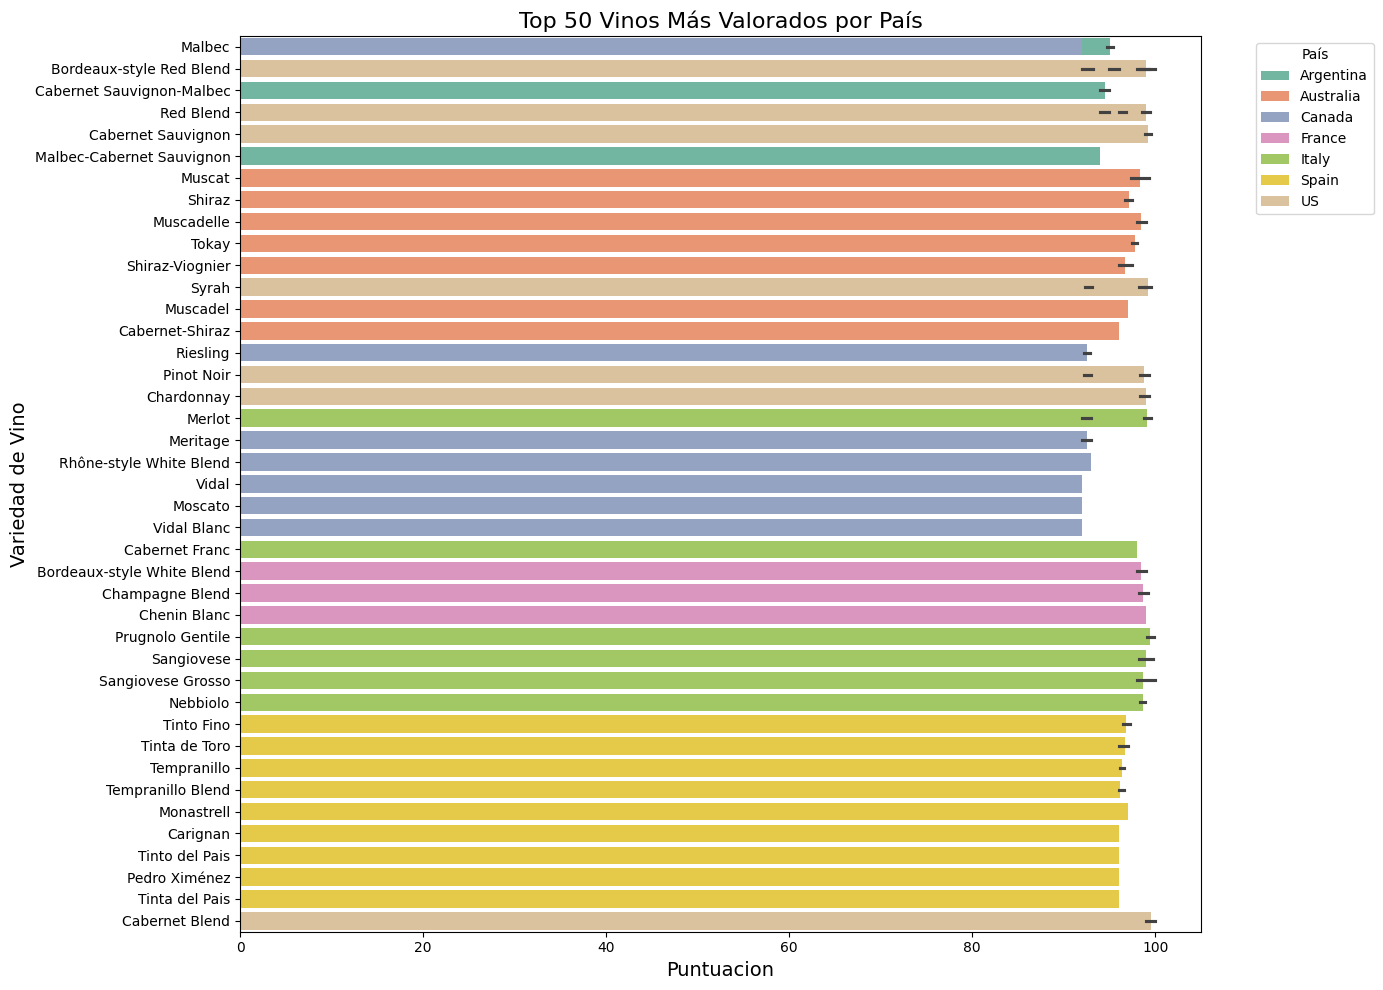

In [19]:

# Gráfico de los top 50 vinos más caros por país
top_10_caros = df_wine.groupby('country').apply(lambda x: x.nlargest(50, 'points')).reset_index(drop=True)

# Configuración del gráfico
plt.figure(figsize=(14, 10))
sns.barplot(data=top_10_caros, x='points', y='variety', hue='country', dodge=False, palette='Set2')

plt.title('Top 50 Vinos Más Valorados por País', fontsize=16)
plt.xlabel('Puntuacion', fontsize=14)
plt.ylabel('Variedad de Vino', fontsize=14)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_7596\3952811716.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_50_peores_valorados = df_wine.groupby('country').apply(lambda x: x.nsmallest(50, 'points')).reset_index(drop=True)


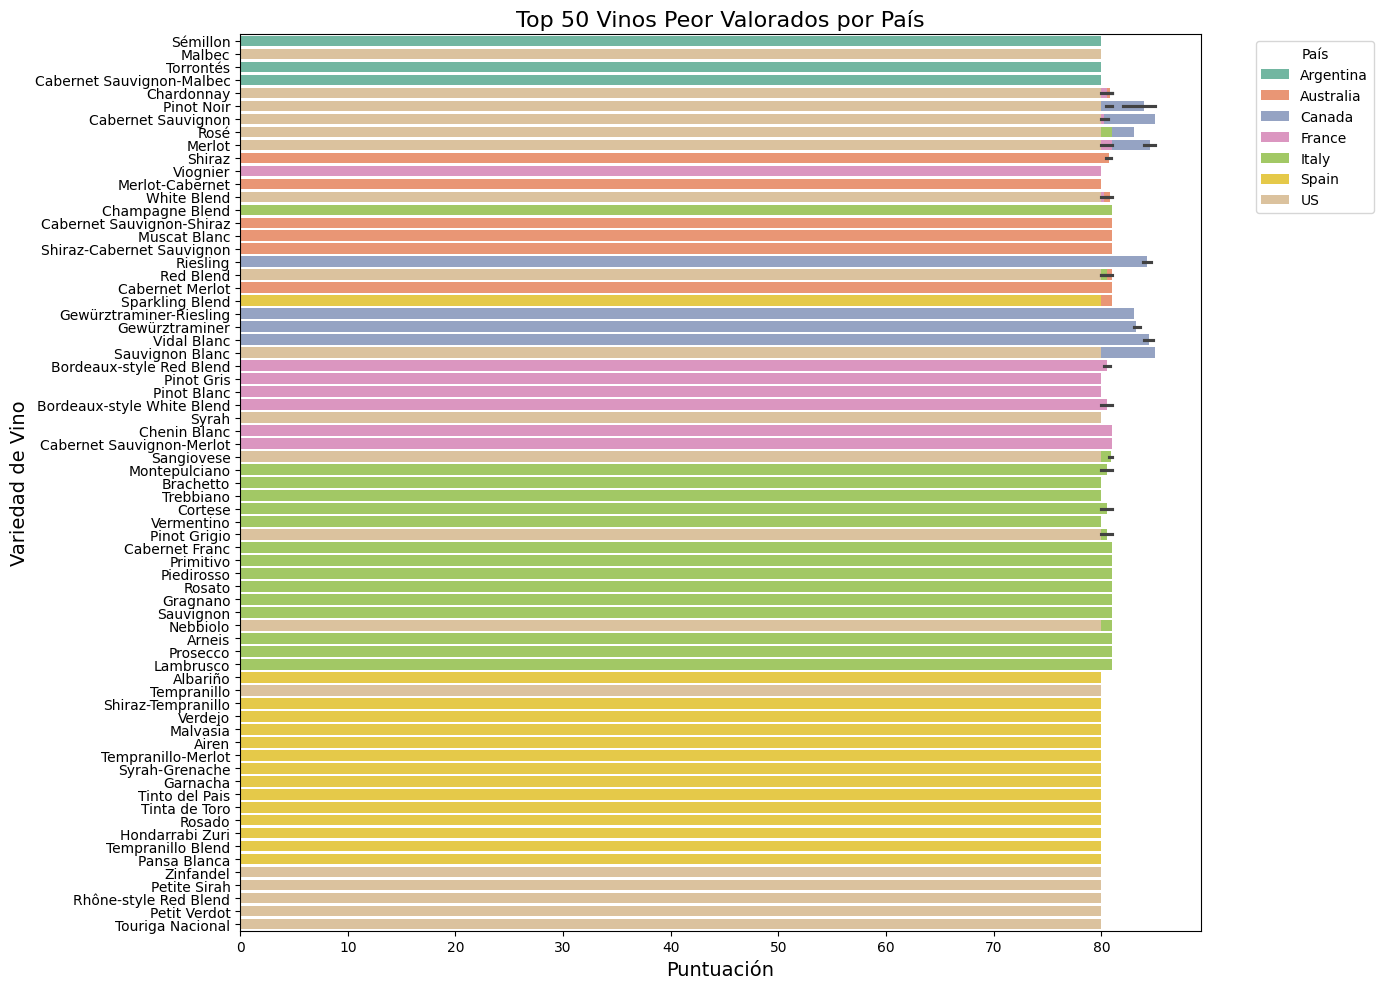

In [20]:
# Gráfico de los 50 vinos peor valorados por país
top_50_peores_valorados = df_wine.groupby('country').apply(lambda x: x.nsmallest(50, 'points')).reset_index(drop=True)

# Configuración del gráfico
plt.figure(figsize=(14, 10))
sns.barplot(data=top_50_peores_valorados, x='points', y='variety', hue='country', dodge=False, palette='Set2')

plt.title('Top 50 Vinos Peor Valorados por País', fontsize=16)
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Variedad de Vino', fontsize=14)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [39]:
# Definir los bins y las etiquetas
bins = [0, 50, 100, 500, 1000, np.inf]  # Rango de precios: Muy Bajo (<50), Bajo (50-100), Medio (100-500), Alto (>500)
labels = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']  # Etiquetas para los segmentos de precio

# Crear una nueva columna 'segmento_precio' para la segmentación
df_wine['segmento_precio'] = pd.cut(df_wine['price'], bins=bins, labels=labels)

# Puntuación promedio por segmento de precio
puntuacion_por_segmento = df_wine.groupby('segmento_precio')['points'].mean()

# Ver los resultados
print(puntuacion_por_segmento)



segmento_precio
Muy Bajo    87.522698
Bajo        90.923253
Medio       92.821637
Alto        95.728070
Muy Alto    96.454545
Name: points, dtype: float64


C:\Users\mario\AppData\Local\Temp\ipykernel_7596\3360640217.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  puntuacion_por_segmento = df_wine.groupby('segmento_precio')['points'].mean()
